# Statistics in Python

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<b>Dataset</b> https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
* Gender - Gender of the customer
* Age - Age of the customer
* Annual Income (k$) - Annual Income of the customee
* Spending Score (1-100) - Score assigned by the mall based on customer behavior and spending nature

#### Reading data using pandas python

In [243]:
mall_data = pd.read_json('datasets/Mall_Customers.json')

mall_data.head(8)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40
5,6,Female,22,17000,76
6,7,Female,35,18000,6
7,8,Female,23,18000,94


In [244]:
#we check the mean of one column
average_income = mall_data['annual_income'].mean()

average_income

60560.0

In [245]:
#we check the mean of each column

print(mall_data.mean())

customer_id         100.50
age                  38.85
annual_income     60560.00
spending_score       50.20
dtype: float64


In [246]:
#here we show how to add a column to the dataframe

mall_data['above_average_income'] = (mall_data['annual_income'] - average_income) > 0

mall_data.sample(5)

,customer_id,gender,age,annual_income,spending_score,above_average_income
110,111,Male,65,63000,52,True
168,169,Female,36,87000,27,True
78,79,Female,23,54000,52,False
5,6,Female,22,17000,76,False
124,125,Female,23,70000,29,True


In [247]:
#get the min or max of a specific column
print(mall_data['age'].min())
print(mall_data['age'].max())

18
70


In [248]:
#get the min of multiple columns
print(mall_data[['age','annual_income']].min())

age                 18
annual_income    15000
dtype: int64


In [249]:
#check the data types
print(mall_data.dtypes)

customer_id              int64
gender                  object
age                      int64
annual_income            int64
spending_score           int64
above_average_income      bool
dtype: object


In [250]:
#get the min of every columm
mall_data.min()

customer_id                  1
gender                  Female
age                         18
annual_income            15000
spending_score               1
above_average_income     False
dtype: object

## Create our own functions to do statistics

In [251]:
#function to create the mean
def mean(data):
    num_elements = len(data)
    print('Number of elements: ', num_elements)
    
    the_sum = data.sum()
    print('Sum: ', the_sum)
    
    return the_sum / num_elements


#function to create the median
def median(data):
    num_elements = len(data)
    
    if(num_elements % 2 == 0):
        return  (data[(num_elements / 2) - 1] + data[(num_elements / 2)]) / 2 
    
    else: 
        return (data[((num_elements + 1) / 2) - 1])
    

#function to run both
#notice that we sort the data, otherwise the median would not be valid
def central_tendency(data):
    sorted_data = data.sort_values()
    print("The average is: ", mean(sorted_data))
    print('The median is: ', median(sorted_data))


In [252]:
test_data = mall_data['annual_income']
central_tendency(test_data)

Number of elements:  200
Sum:  12112000
The average is:  60560.0
The median is:  61500.0


## Display the mean in a graph

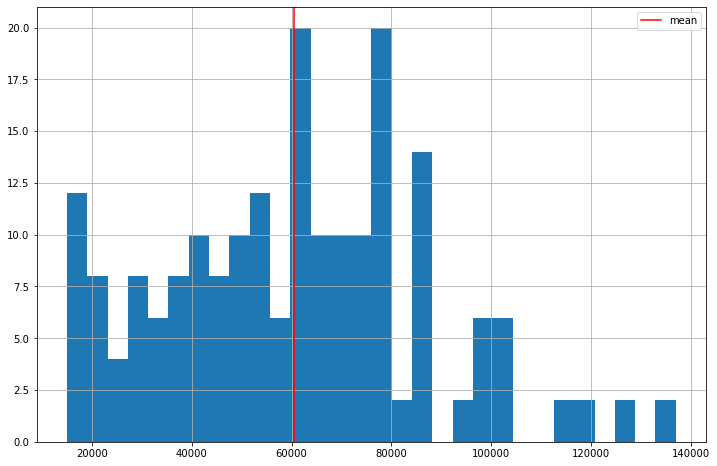

In [253]:
#set the size of the figure
plt.figure(figsize=(12, 8))

#create a histogram with 30 bins
mall_data['annual_income'].hist(bins=30)

#add a line to show the mean
#one can also put 'median' under label, to show the label
plt.axvline(mall_data['annual_income'].mean(), color='r', label='mean')

plt.legend()

## Add in data to study the effects of outliers

In [254]:
#drop some columns that won't help us here
mall_data.drop(columns=['above_average_income','customer_id'], inplace=True)
print(mall_data.head())

   gender  age  annual_income  spending_score
0    Male   19          15000              39
1    Male   21          15000              81
2  Female   20          16000               6
3  Female   23          16000              77
4  Female   31          17000              40


In [255]:
listOfSeries = [pd.Series(['Male', 20, 8000,25], index=mall_data.columns ), 
                pd.Series(['Female', 20, 7000,10], index=mall_data.columns  ), 
                pd.Series(['Female', 19, 401000,79], index=mall_data.columns ),
                pd.Series(['Male', 20, 390000,56], index=mall_data.columns ), 
                pd.Series(['Female', 39, 490000, 19], index=mall_data.columns ),
                pd.Series(['Male', 40, 560000,45], index=mall_data.columns )]

In [256]:
updated_df = mall_data.append(listOfSeries, ignore_index = True)
print(updated_df.head())

   gender  age  annual_income  spending_score
0    Male   19          15000              39
1    Male   21          15000              81
2  Female   20          16000               6
3  Female   23          16000              77
4  Female   31          17000              40


In [257]:
#test to see the new statistics
test_data = updated_df['annual_income']
central_tendency(test_data)

Number of elements:  206
Sum:  13968000
The average is:  67805.82524271845
The median is:  62000.0


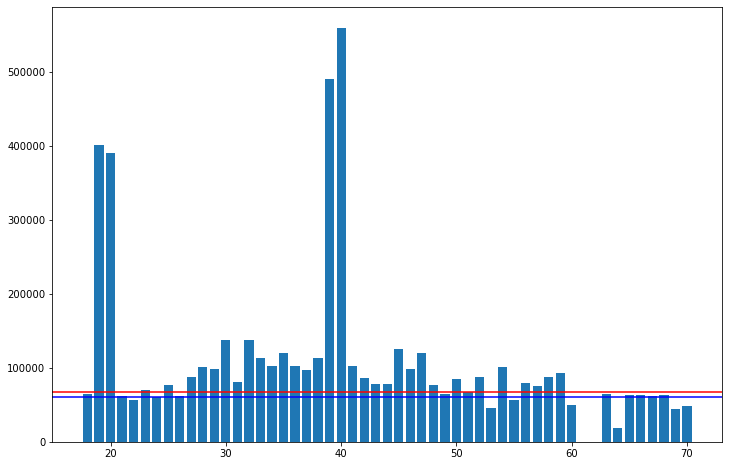

In [258]:
plt.figure(figsize=(12,8))
plt.bar(updated_df['age'],updated_df['annual_income'])
plt.axhline(updated_df['annual_income'].mean(), color='r', label='mean')
plt.axhline(mall_data['annual_income'].mean(), color='b', label='median')
plt.show()

## Using the mode

In [259]:
#create a dictionary to record how many times each age appears
age_count = {}

for p in updated_df['age']:
    if p not in age_count:
        age_count[p] = 1
    else:
        age_count[p] += 1

In [260]:
print(age_count)

{19: 9, 21: 5, 20: 8, 23: 6, 31: 8, 22: 3, 35: 9, 64: 1, 30: 7, 67: 4, 58: 2, 24: 4, 37: 3, 52: 2, 25: 3, 46: 3, 54: 4, 29: 5, 45: 3, 40: 7, 60: 3, 53: 2, 18: 4, 49: 7, 42: 2, 36: 6, 65: 2, 48: 5, 50: 5, 27: 6, 33: 3, 59: 4, 47: 6, 51: 2, 69: 1, 70: 2, 63: 2, 43: 3, 68: 3, 32: 11, 26: 2, 57: 2, 38: 6, 55: 1, 34: 5, 66: 2, 39: 4, 44: 2, 28: 4, 56: 1, 41: 2}


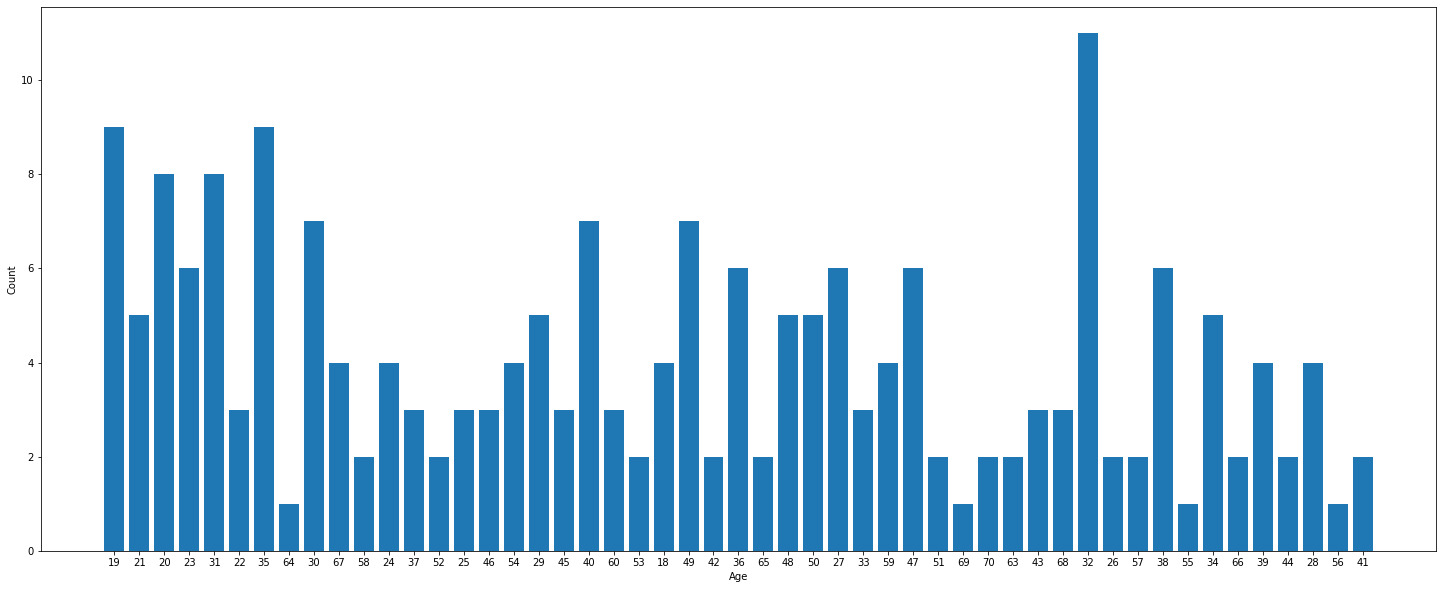

In [261]:
#create a chart to see the count of each value
plt.figure(figsize=(25, 10))

plt.bar(range(len(age_count)), list(age_count.values()), align='center')
plt.xticks(range(len(age_count)), list(age_count.keys()))

plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

In [262]:
#create our own function to calculate the mode
#use your dictionary code to do so

def the_mode(data):
    age_count = {}
    
    for p in updated_df['age']:
        if p not in age_count:
            age_count[p] = 1
        else:
            age_count[p] += 1
    
    count = 0 
    size = 0
    
    for s, c in age_count.items():
        if count < c:
            count = c
            size = s
            
    print('Size: ', size, '\nFrequency: ', count)

In [263]:
the_mode(updated_df['age'])

Size:  32 
Frequency:  11


In [264]:
#compare the pandas mode function to your function

print(updated_df['age'].mode())

0    32
dtype: int64


In [265]:
#show all the modes
#we see that annual_income has two modes

print(updated_df.mode())

   gender   age  annual_income  spending_score
0  Female  32.0          54000            42.0
1     NaN   NaN          78000             NaN


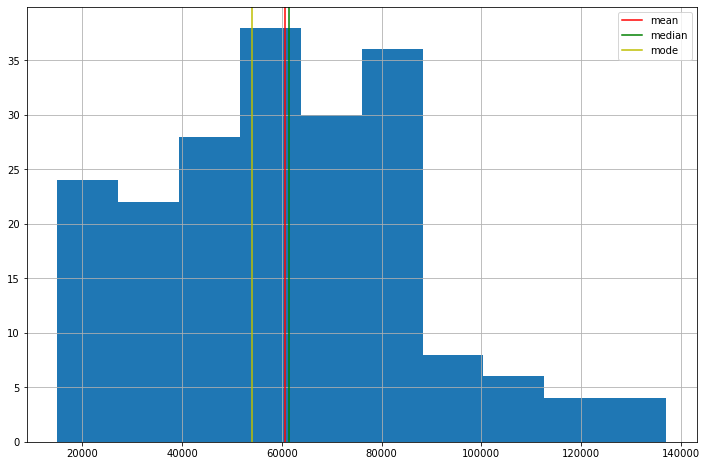

In [266]:
#create a chart using the mean, median, and mode of annual income (using only the first mode) of our original data set

plt.figure(figsize=(12, 8))

mall_data['annual_income'].hist()

plt.axvline(mall_data['annual_income'].mean(), color='r', label='mean')
plt.axvline(mall_data['annual_income'].median(), color='g', label='median')
plt.axvline(mall_data['annual_income'].mode().values[0], color='y', label='mode')

plt.legend()

## Grouby and Cumsum

We will get the count and cumulative sum of the annual income.

In [267]:
#place it in it's own dataframe by copying it in

income = mall_data[['annual_income']].copy()
income.head()

,annual_income
0,15000
1,15000
2,16000
3,16000
4,17000


In [268]:
#add a counts column filled with 1's

income['count_income'] = [1]*income.shape[0]
print(income.head())

   annual_income  count_income
0          15000             1
1          15000             1
2          16000             1
3          16000             1
4          17000             1


In [269]:
#we are sorting the data so that we can get the cumulative income

income = income.sort_values('annual_income')
income.head()

,annual_income,count_income
0,15000,1
1,15000,1
2,16000,1
3,16000,1
4,17000,1


In [270]:
#get the count of each datapoint

income = income.groupby('annual_income',as_index = False).count()
income.head(7)

,annual_income,count_income
0,15000,2
1,16000,2
2,17000,2
3,18000,2
4,19000,4
5,20000,4
6,21000,2


In [271]:
#create a cumulative sum column

income['cumsum_income'] = income['count_income'].cumsum()
income.head(10)

,annual_income,count_income,cumsum_income
0,15000,2,2
1,16000,2,4
2,17000,2,6
3,18000,2,8
4,19000,4,12
5,20000,4,16
6,21000,2,18
7,23000,2,20
8,24000,2,22
9,25000,2,24


## Get the IQR

In [272]:
#we get the various quantiles of the data

q1 = income['annual_income'].quantile(.25)
q2 = income['annual_income'].quantile(.5)
q3 = income['annual_income'].quantile(.75)
iqr = q3-q1

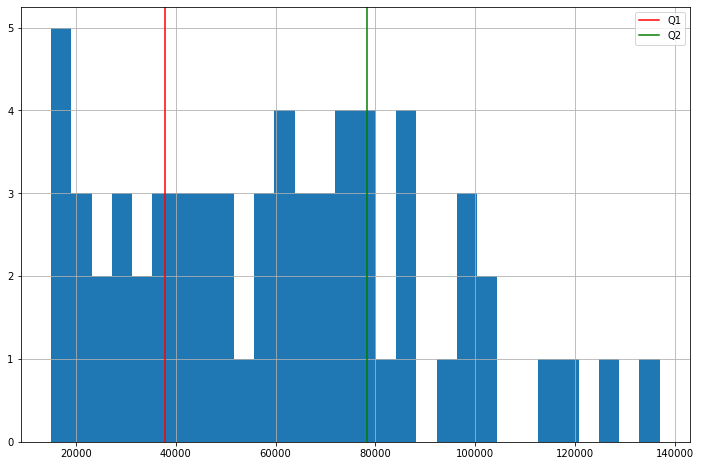

In [273]:
plt.figure(figsize=(12, 8))

income['annual_income'].hist(bins=30)

plt.axvline(q1, color='r', label='Q1')
plt.axvline(q3, color='g', label='Q2')

plt.legend()

## Calculating Variance and Standard Deviation

In [274]:
#create a function to calculate variance

def variance(data):
    
    diffs = 0
    avg = sum(data) / len(data)
    
    for n in data:
        diffs += (n - avg)**2
    
    return (diffs/(len(data)-1))

def stdev(data):
    return variance(data)**.5

In [275]:
#compare our function to the pandas function

print(income['annual_income'].var())
print(variance(income['annual_income']))

877999751.9841269
877999751.9841269


In [276]:
#compare our function to the pandas function

print(income['annual_income'].std())
print(stdev(income['annual_income']))

29631.06059499266
29631.06059499266


# Statistical Visualizations

In [277]:
df = mall_data.copy()
print(df.head())

   gender  age  annual_income  spending_score
0    Male   19          15000              39
1    Male   21          15000              81
2  Female   20          16000               6
3  Female   23          16000              77
4  Female   31          17000              40


In [278]:
#get general stats

df.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60560.000000,50.200000
std,13.969007,26264.721165,25.823522
min,18.000000,15000.000000,1.000000
25%,28.750000,41500.000000,34.750000
50%,36.000000,61500.000000,50.000000
75%,49.000000,78000.000000,73.000000
max,70.000000,137000.000000,99.000000


## Univariate Considerations

<function matplotlib.pyplot.show(close=None, block=None)>

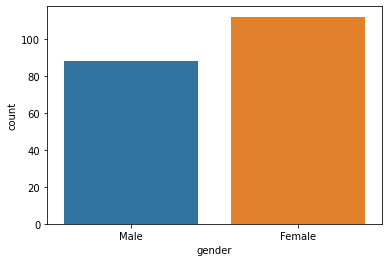

In [282]:
#get a count of gender

sns.countplot(x = df['gender'])
plt.show

<AxesSubplot:title={'center':'Age Histogram '}, ylabel='Frequency'>

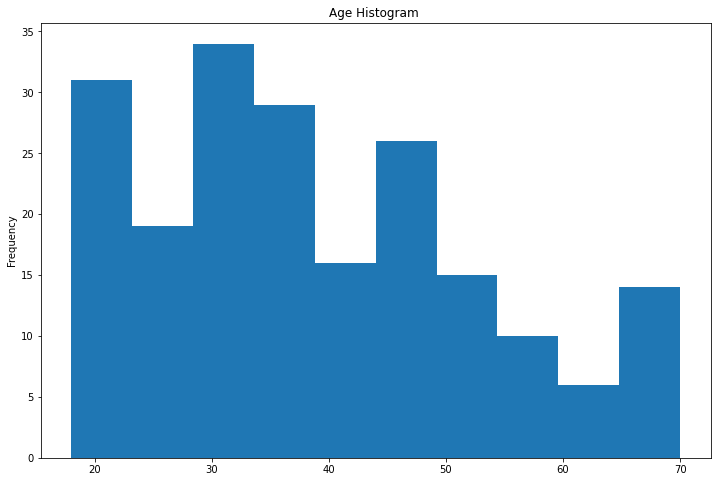

In [283]:
#plot histogram

plt.figure(figsize=(12,8))
df['age'].plot(kind = 'hist', title = 'Age Histogram ')

<AxesSubplot:title={'center':'Box Plot '}>

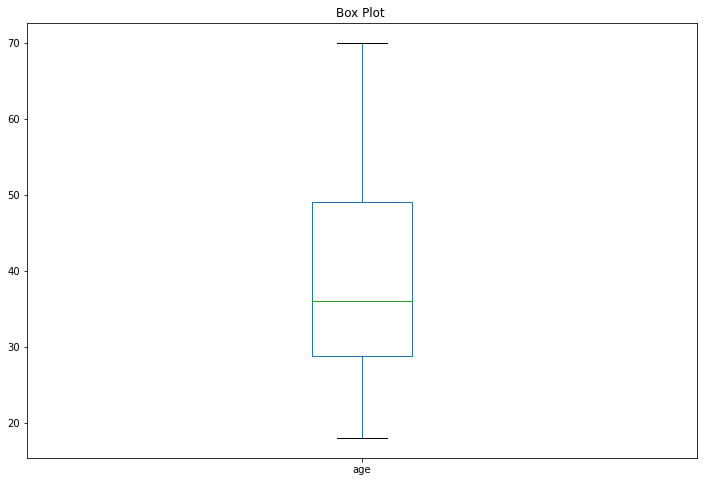

In [284]:
#plot boxplot

plt.figure(figsize=(12,8))
df['age'].plot(kind = 'box', title = 'Box Plot ')

<AxesSubplot:title={'center':'Age KDE '}, ylabel='Density'>

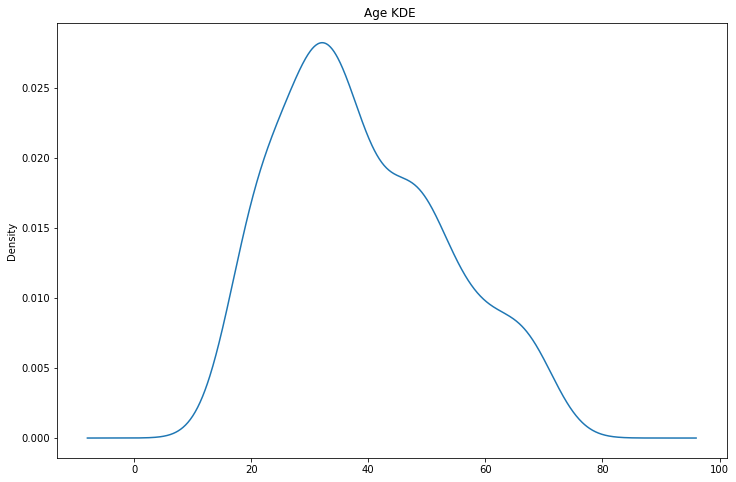

In [285]:
#plot kde

plt.figure(figsize=(12,8))
df['age'].plot(kind = 'kde', title = 'Age KDE ')

## Bivariate Considerations

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

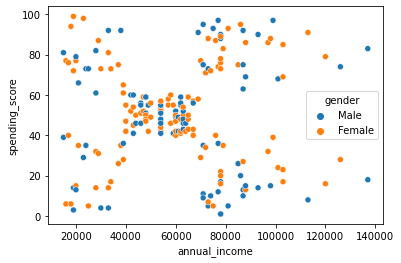

In [289]:
#plot the annual_income against the spending_score and color it according to gender

sns.scatterplot(x = 'annual_income', y = 'spending_score', hue = 'gender', data = df)

In [291]:
#use groupby to understand the data

gender_group = df.groupby('gender', as_index = False)
gender_group.head()

,gender,age,annual_income,spending_score
0,Male,19,15000,39
1,Male,21,15000,81
2,Female,20,16000,6
3,Female,23,16000,77
4,Female,31,17000,40
5,Female,22,17000,76
6,Female,35,18000,6
8,Male,64,19000,3
10,Male,67,19000,14
14,Male,37,20000,13


In [293]:
gender_group.describe().T

0              1
age            count     112.000000      88.000000
               mean       38.098214      39.806818
               std        12.644095      15.514812
               min        18.000000      18.000000
               25%        29.000000      27.750000
               50%        35.000000      37.000000
               75%        47.500000      50.500000
               max        68.000000      70.000000
annual_income  count     112.000000      88.000000
               mean    59250.000000   62227.272727
               std     26011.951515   26638.373182
               min     16000.000000   15000.000000
               25%     39750.000000   45500.000000
               50%     60000.000000   62500.000000
               75%     77250.000000   78000.000000
               max    126000.000000  137000.000000
spending_score count     112.000000      88.000000
               mean       51.526786      48.511364
               std        24.114950      27.896770
               min         5.000000       1.000000
               25%        35.000000      24.500000
               50%        50.000000      50.000000
               75%        73.000000      70.000000
               max        99.000000      97.000000

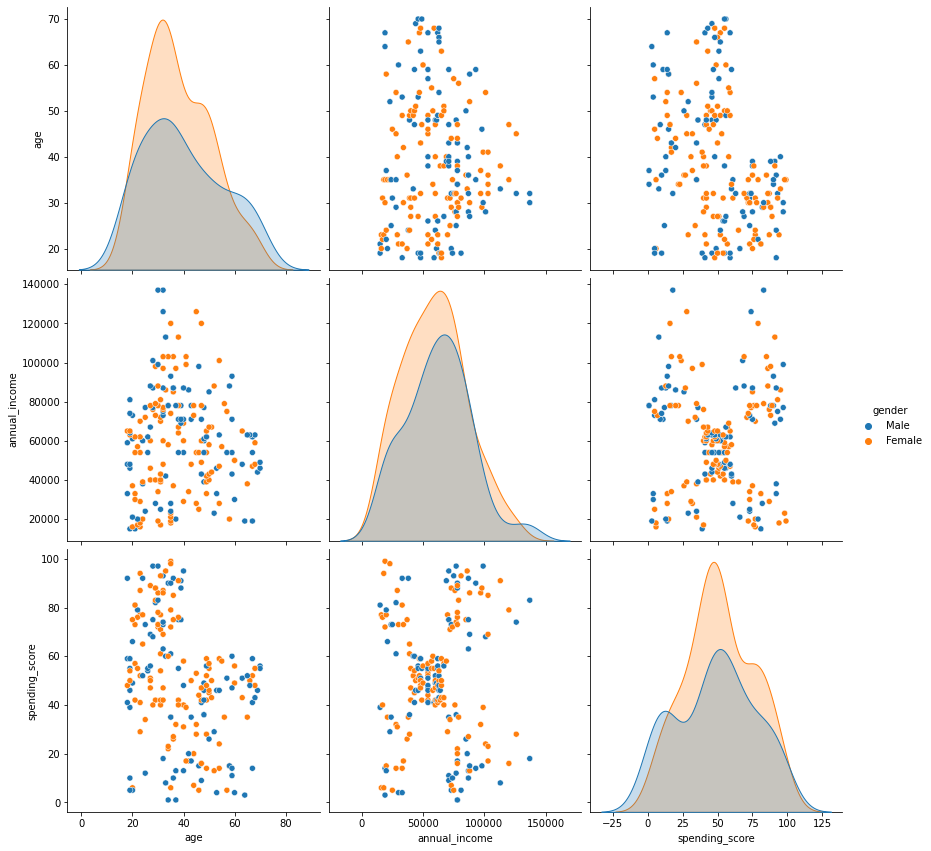

In [294]:
#get a general overview of gender

sns.pairplot(df, hue= 'gender', height = 4)

## We can save it in any forms like normal text file, csv or json. It will save it in the location where you prefer as well 

In [279]:
mall_data.to_csv('datasets/mall_data_processed.csv', index=False)

In [280]:
mall_data_updated = pd.read_csv('datasets/mall_data_processed.csv', index_col=0)

mall_data_updated.head(5)

,age,annual_income,spending_score
gender,,,
Male,19,15000,39
Male,21,15000,81
Female,20,16000,6
Female,23,16000,77
Female,31,17000,40
